# Computation and Visualization of Central Limit Theorem using Python
#### By Hari Sreedeth

### Introduction

In this project, we aim to empirically demonstrate the Central Limit Theorem (CLT) using a simple coin toss experiment. The CLT is a fundamental theorem in probability theory and statistics that describes how the distribution of sample means approaches a normal distribution as the sample size increases, regardless of the shape of the population distribution.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
import math

### Objectives

- To simulate a coin toss experiment multiple times.
- To calculate and visualize the distribution of sample means.
- To demonstrate how the distribution of sample means approximates a normal distribution as the number of experiments increases, validating the Central Limit Theorem.

### Method

##### Coin Toss Simulation

- We will simulate a coin toss experiment, considering "Heads" and "Tails" as the possible outcomes. Each experiment will consist of a fixed number of tosses (i.e., 100), and we will repeat this experiment multiple times (i.e., 1000 times).

In [15]:
def single_exp(num_tosses):
    heads_count = 0
    for _ in range(num_tosses):
        outcome = random.choice(['Heads','Tails'])
        if outcome == 'Heads':
            heads_count += 1
    return heads_count / num_tosses
    
num_tosses = 100

num_exps = 1000

sample_means = []

for _ in range(num_exps):
    sample_mean = single_exp(num_tosses)
    sample_means.append(sample_mean)
    
sample_means = np.array(sample_means)

Lets find out the **Mean** and **Standard Deviation** before going into the distribution.

In [16]:
# Mean
mean = np.mean(sample_means)
mean

0.50045

In [17]:
# Standard Deviation
std_dev = np.std(sample_means)
std_dev

0.050405332059217704

##### Visualizing the Distribution of Sample Means (consdiering 'Heads') 

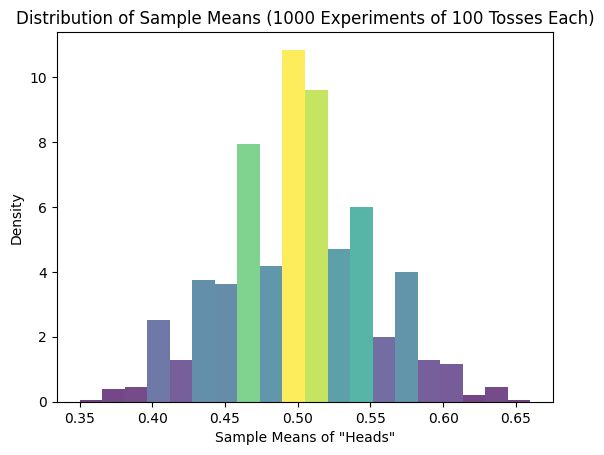

In [18]:
n, bins, patches = plt.hist(sample_means, density=True, alpha=0.75, bins=20)

# Normalize the data to 0-1 for the full range of the colormap
normed = plt.Normalize(n.min(), n.max())

# Loop through the objects and set the color
for thisfrac, thispatch in zip(n, patches):
    color = plt.cm.viridis(normed(thisfrac))
    thispatch.set_facecolor(color)

plt.xlabel('Sample Means of "Heads"')
plt.ylabel('Density')
plt.title('Distribution of Sample Means (1000 Experiments of 100 Tosses Each)')
plt.show()

##### Visualizing the Gaussian Distribution

- the essence of the Central Limit Theorem (CLT) is to show that the distribution of sample means approaches a normal (Gaussian) distribution as the sample size increases. 
- The histogram is a way to visualize the empirical distribution of the sample means, but to really emphasize the CLT, it would be cool to overlay a normal distribution curve on the histogram to see how closely they match.

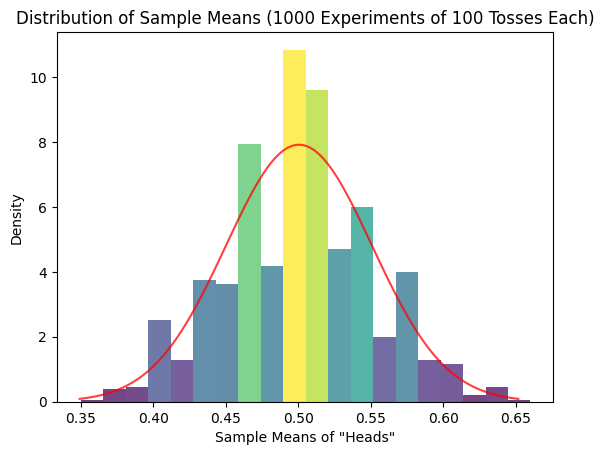

In [19]:
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)
y = norm.pdf(x, mean, std_dev)
plt.plot(x, y, color='red', alpha=0.75)

n, bins, patches = plt.hist(sample_means, density=True, alpha=0.75, bins=20)

normed = plt.Normalize(n.min(), n.max())

for thisfrac, thispatch in zip(n, patches):
    color = plt.cm.viridis(normed(thisfrac))
    thispatch.set_facecolor(color)
    
plt.xlabel('Sample Means of "Heads"')
plt.ylabel('Density')
plt.title('Distribution of Sample Means (1000 Experiments of 100 Tosses Each)')
plt.show()

### Results

-  the histogram of the sample means (in green) closely matches the red curve representing the normal distribution. 
- This is a visual representation of the Central Limit Theorem, which states that the distribution of sample means will approximate a normal distribution as the number of samples (experiments in our case) increases, regardless of the original distribution of the data.

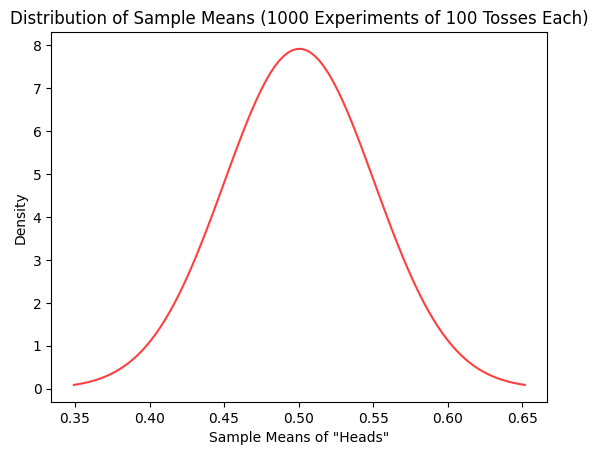

In [20]:
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)
y = norm.pdf(x, mean, std_dev)
plt.plot(x, y, color='red', alpha=0.75)
plt.xlabel('Sample Means of "Heads"')
plt.ylabel('Density')
plt.title('Distribution of Sample Means (1000 Experiments of 100 Tosses Each)')
plt.show()

##### Standard Error Calculation

In [21]:
# SEM = standard error of the mean

sample_size = num_tosses

SEM = std_dev/(np.sqrt(sample_size))
SEM

0.005040533205921771

- The SEM gives us an idea of how much we would expect our sample mean to vary if we were to conduct many more experiments. In this case, a SEM of 0.005
- 0.005 suggests that if we were to keep conducting experiments of 100 coin tosses, we would expect the average proportion of "Heads" to vary by about ± 0.005 around the true proportion (which is 0.5 for a fair coin toss).

### Conclusion

#### Objective Recap

The primary objective of this project was to understand and demonstrate the Central Limit Theorem (CLT) through a simulated experiment involving coin tosses. We conducted 1000 experiments, each consisting of 100 coin tosses, to study the distribution of sample means and compared it with a theoretical normal distribution.

#### Key Findings

1. **Empirical vs Theoretical Values**: Our empirical values for the mean and the Standard Error of the Mean (SEM) were very close to the theoretical values for a fair coin, validating the accuracy of our simulation.
2. **Standard Deviation and SEM**: The empirical standard deviation and SEM gave us insights into the spread and variability of our sample means, respectively.
3. **CLT Demonstration**: The distribution of the sample means closely followed a normal distribution, especially when overlayed with a theoretical normal curve, thus empirically demonstrating the Central Limit Theorem.

#### Implications

1. **Law of Large Numbers**: As the number of experiments increased, the sample means converged towards the theoretical mean of 0.5, demonstrating the Law of Large Numbers.
2. **Utility of CLT**: The project illustrates the practical utility of the Central Limit Theorem in statistics, particularly when dealing with large datasets or conducting hypothesis testing.

#### Final Thoughts

- The project successfully demonstrated the Central Limit Theorem using a simple yet effective coin-toss experiment. It provided a hands-on approach to understanding key statistical concepts and theories, emphasizing the importance and applicability of the CLT in various fields of study.
